<a href="https://colab.research.google.com/github/RendyRyanda/Membersihkan-Dataset-Penjualan-Video-Game/blob/main/2318042DataCleansing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata

In [ ]:
# Langkah 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Baca Dataset pelanggan yang kotor

In [ ]:
# Load dataset
file_path = "/content/drive/MyDrive/Colab Notebooks/vgsales.csv"# ganti sesuai path di Colab
df_dirty = pd.read_csv(file_path)

In [ ]:
# Use the already loaded dataframe
df = df_dirty

# Tampilkan semua baris data
print("=== Dataset Asli ===")
print(df.head())

print("\nInfo Dataset:")
print(df.info())

print("\nJumlah Data & Kolom:", df.shape)

=== Dataset Asli ===
   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column        Non-N

# 3. Mengecek Nilai yang Hilang

In [ ]:
print("\n=== Cek Missing Values ===")
print(df.isnull().sum())


=== Cek Missing Values ===
Rank             0
Name             0
Platform         0
Year            10
Genre            0
Publisher        1
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


# 4. Perbaikan Nilai yang Hilang

In [ ]:
# Kolom 'year' → isi dengan 'Unknown'
df_dirty['Year'].fillna("Unknown", inplace=True)

# Kolom 'publisher' → isi dengan 'Unknown'
df_dirty['Publisher'].fillna("Unknown", inplace=True)

/tmp/ipython-input-2214766728.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_dirty['Year'].fillna("Unknown", inplace=True)
/tmp/ipython-input-2214766728.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_dirty['Year'].fillna("Unknown", inplace=True)
/tmp/ipython-input-2214766728.py:5: FutureWarning: A value is trying to be set on a cop

# 5. Cek Ulang Perbaikan Mising Velue

In [ ]:
print("\n=== Missing Values Setelah Perbaikan ===")
print(df_dirty.isnull().sum())


=== Missing Values Setelah Perbaikan ===
Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


# 6. Cek & Hapus Duplikasi

In [ ]:
print("\n=== Cek Data Duplikat ===")
dup_count = df_dirty.duplicated().sum()
print(f"Jumlah baris duplikat: {dup_count}")

before = df_dirty.shape[0]
df_clean = df_dirty.drop_duplicates()
after = df_clean.shape[0]


=== Cek Data Duplikat ===
Jumlah baris duplikat: 0


In [ ]:
print(f"Jumlah baris sebelum cleaning: {before}")
print(f"Jumlah baris setelah cleaning: {after}")
print(f"Jumlah baris terhapus (duplikat): {before - after}")

Jumlah baris sebelum cleaning: 999
Jumlah baris setelah cleaning: 999
Jumlah baris terhapus (duplikat): 0


# 7. Memperbaiki Nama Game Yang Ada simbolnya

In [ ]:
# Normalisasi teks supaya karakter aneh hilang
def normalize_text(text):
    if pd.isna(text):
        return text
    text = unicodedata.normalize("NFKD", str(text))
    text = text.encode("ascii", errors="ignore").decode("utf-8", errors="ignore")
    return text.strip()

df["Name"] = df["Name"].apply(normalize_text)

# Cek baris index 88 (Rank = 89)
print("Sebelum perbaikan:")
print(df.iloc[88][["Rank", "Name"]])

# Kalau masih ada 'Pokmon' atau aneh, paksa ganti
df.loc[df.index == 88, "Name"] = "Pokemon Platinum Version"

print("\nSesudah perbaikan:")
print(df.iloc[88][["Rank", "Name"]])

# Tampilkan semua baris yang ada Pokemon
print("\nSemua game Pokemon:")
print(df[df["Name"].str.contains("Pokemon", case=False, na=False)][["Rank", "Name"]])

Sebelum perbaikan:
Rank                          89
Name    PokAmon Platinum Version
Name: 88, dtype: object

Sesudah perbaikan:
Rank                          89
Name    Pokemon Platinum Version
Name: 88, dtype: object

Semua game Pokemon:
     Rank                                               Name
4       5                           Pokemon Red/Pokemon Blue
12     13                        Pokemon Gold/Pokemon Silver
20     21                      Pokemon Diamond/Pokemon Pearl
25     26                      Pokemon Ruby/Pokemon Sapphire
26     27                        Pokemon Black/Pokemon White
32     33                                Pokemon X/Pokemon Y
45     46               Pokemon HeartGold/Pokemon SoulSilver
49     50          Pokemon Omega Ruby/Pokemon Alpha Sapphire
58     59                  Pokemon FireRed/Pokemon LeafGreen
81     82                    Pokemon Black 2/Pokemon White 2
88     89                           Pokemon Platinum Version
165   166                   

# 8. Standarisasi Kolom Pembelian Setiap Negara, Global dan Penjualan Lainnya Dan Menyimpan Datanya

*   Menambahkan kolom baru untuk memudahkan dalam membaca data

*   Tidak menghilangkan versi numerik berbilangan desimal agar memudahkan dalam perhitungan data

In [ ]:
# Kolom penjualan
cols_to_convert = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

# Create a fresh copy of df_dirty to avoid issues with re-execution
comparison = df_dirty.copy()

# Pastikan numeric
for col in cols_to_convert:
    comparison[col] = pd.to_numeric(comparison[col], errors="coerce")

# Buat versi Million tepat di samping kolom aslinya
for col in cols_to_convert:
    new_col_name = col + "_Million"
    if new_col_name not in comparison.columns:
        comparison.insert(
            comparison.columns.get_loc(col) + 1,   # posisi setelah kolom asli
            new_col_name,
            comparison[col].apply(lambda x: f"{x:.2f}M" if pd.notna(x) else "-")
        )

# Tampilkan 5 baris pertama
print("Dataset with added columns (Million) next to original:")
print(comparison.head(5))

# Simpan ke Google Drive
output_path = "/content/drive/MyDrive/Colab Notebooks/vgsales.xlsx"
comparison.to_excel(output_path, index=False)

print("\nDataset bersih disimpan di:", output_path)


Dataset with added columns (Million) next to original:
   Rank                      Name Platform    Year         Genre Publisher  \
0   1.0                Wii Sports      Wii  2006.0        Sports  Nintendo   
1   2.0         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2   3.0            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3   4.0         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4   5.0  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales NA_Sales_Million  EU_Sales EU_Sales_Million  JP_Sales  \
0     41.49           41.49M     29.02           29.02M      3.77   
1     29.08           29.08M      3.58            3.58M      6.81   
2     15.85           15.85M     12.88           12.88M      3.79   
3     15.75           15.75M     11.01           11.01M      3.28   
4     11.27           11.27M      8.89            8.89M     10.22   

  JP_Sales_Million  Other_Sales Other_Sales_Million  Global_S

# 9. DATA ENRICHMENT - MENGISI ANGKA 0 YANG ADA PADA KOLOM

*   Mengisi angka Penjualan yang memiliki nilai 0 dengan menggunakan mean

In [ ]:
# Pastikan semua kolom numerik bertipe float
for col in df.select_dtypes(include=["number"]).columns:
    df[col] = df[col].astype(float)

changed_rows = []

# Loop tiap kolom numerik
for col in df.select_dtypes(include=["number"]).columns:
    if (df[col] == 0).any():  # hanya kalau ada nilai 0
        mean_val = df.loc[df[col] > 0, col].mean()

        # Simpan data sebelum diganti
        before = df.loc[df[col] == 0, [col]].copy()
        before = before.rename(columns={col: "Sebelum"})
        before["Kolom"] = col
        before["Sesudah"] = mean_val

        # Update dataframe (ganti 0 dengan mean)
        df.loc[df[col] == 0, col] = mean_val

        # Tambahkan ke list perubahan
        changed_rows.append(before)

# Gabungkan semua perubahan
if changed_rows:
    result = pd.concat(changed_rows, axis=0).reset_index(drop=True)
    print("=== Data yang berubah (sebelum → sesudah) ===")
    print(result.head(10))  # tampilkan 10 baris pertama
else:
    print("Tidak ada nilai 0 yang ditemukan.")

=== Data yang berubah (sebelum → sesudah) ===
   Sebelum     Kolom   Sesudah
0      0.0  NA_Sales  2.111768
1      0.0  NA_Sales  2.111768
2      0.0  NA_Sales  2.111768
3      0.0  NA_Sales  2.111768
4      0.0  NA_Sales  2.111768
5      0.0  NA_Sales  2.111768
6      0.0  NA_Sales  2.111768
7      0.0  NA_Sales  2.111768
8      0.0  NA_Sales  2.111768
9      0.0  NA_Sales  2.111768


# 10. Cek Kolom Tidak Relevan

In [ ]:
# 1. Cek jumlah nilai unik per kolom
print("=== Jumlah nilai unik per kolom ===")
print(df.nunique())

=== Jumlah nilai unik per kolom ===
Rank            999
Name            824
Platform         24
Year             38
Genre            12
Publisher        54
NA_Sales        399
EU_Sales        304
JP_Sales        223
Other_Sales     156
Global_Sales    448
dtype: int64


In [ ]:
# Identifikasi kolom kandidat tidak relevan
irrelevant_cols = []

# Kolom dengan 1 nilai unik
single_value_cols = df.nunique()[df.nunique() == 1].index.tolist()
irrelevant_cols.extend(single_value_cols)

In [ ]:
# Hapus kolom tidak relevan
df = df.drop(columns=set(irrelevant_cols), errors='ignore')

print("\n=== Setelah perbaikan ===")
print("Kolom dataset sekarang:", df.columns.tolist())


=== Setelah perbaikan ===
Kolom dataset sekarang: ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']


# 11. Menampilkan Beberapa Data Yang Sudah Di Cleansing



*  Menampilkan dataset akhir setelah proses cleansing:

* Tidak ada missing value penting (semua sudah diisi dengan median, modus, atau kategori default).

* Tidak ada duplikasi data.

* Tidak ada kolom tidak relevan yang hanya memiliki 1 nilai unik.



In [ ]:
print("\nContoh data bersih:")
display(df.head(10))


Contoh data bersih:


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6.0,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7.0,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8.0,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9.0,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10.0,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


# 12. Visualisasi Data penjualan Game Secara Global

/tmp/ipython-input-3439799797.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


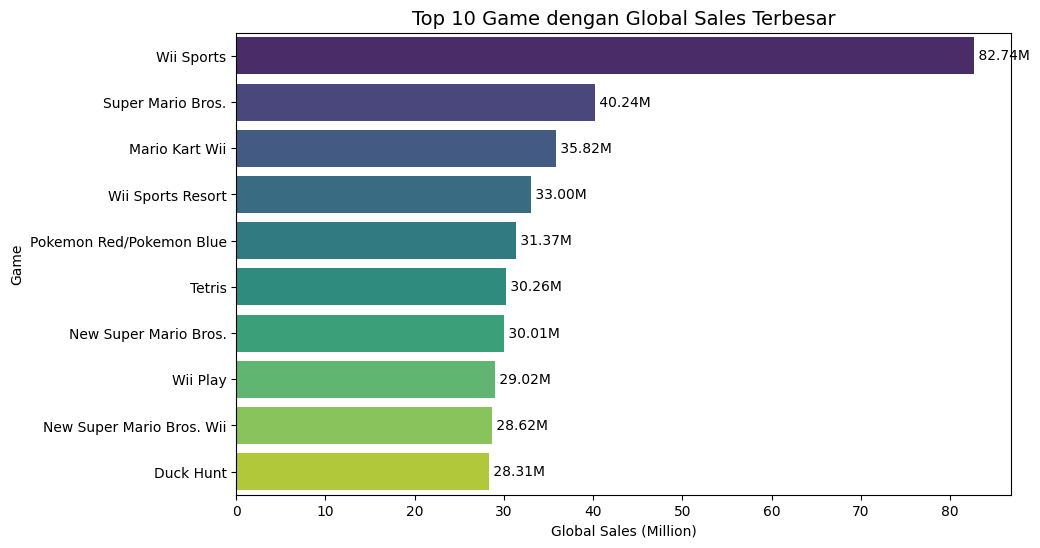

In [ ]:
# Ambil 10 data dengan Global_Sales terbesar
top10_sales = df_dirty.nlargest(10, "Global_Sales")

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_sales,
    x="Global_Sales",
    y="Name",
    palette="viridis"
)

# Tambahkan label angka di batang
for i, v in enumerate(top10_sales["Global_Sales"]):
    plt.text(v, i, f" {v:.2f}M", va="center")

plt.title("Top 10 Game dengan Global Sales Terbesar", fontsize=14)
plt.xlabel("Global Sales (Million)")
plt.ylabel("Game")
plt.show()